In [1]:
import torch

## autograd
out = $$\Sigma2 * (a_i+2)^2$$

In [4]:
a = torch.tensor([[1,2,3],[4,5,6]], requires_grad=True, dtype=torch.float)
b = a + 2
c = 2 * b * b
print(c)
out = c.mean()
print(out)
out.backward()
print(a.grad)

tensor([[ 18.,  32.,  50.],
        [ 72.,  98., 128.]], grad_fn=<MulBackward0>)
tensor(66.3333, grad_fn=<MeanBackward0>)
tensor([[2.0000, 2.6667, 3.3333],
        [4.0000, 4.6667, 5.3333]])


## calling backward a second time should set retain_graph=True

In [5]:
a = torch.ones((2, 3), requires_grad=True)
b = a + 2
c = 2 * b * b
out = c.mean()
out.backward(retain_graph=True)
print(a.grad)
out.backward()
print(a.grad)

tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[4., 4., 4.],
        [4., 4., 4.]])


## LinearModel
### model

In [8]:
import torch
import torch.nn as nn
class LinearModel(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_dim, out_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearModel(1, 1)

### learningRage, optimizer, criterion

In [9]:
learnRate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learnRate)
criterion = nn.MSELoss()

### data. y=3x + 5

In [7]:
X_train = torch.tensor([1,2,3,4,5,6,7,8,9,10], dtype=torch.float).reshape(-1, 1)
y_train = torch.tensor([3 * x + 5 for x in X_train]).reshape(-1, 1)

### training

In [11]:
epochs = 1000
for epoch in range(epochs):
    epoch += 1
    inputs = X_train
    labels = y_train
    out = model(inputs)
    optimizer.zero_grad()
    loss = criterion(out, labels)
    loss.backward()
    optimizer.step()
    predicted = model.forward(X_train)
    if epoch % 100 == 0:
        print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 100, loss 0.00048247529775835574
epoch 200, loss 0.0002079510159092024
epoch 300, loss 8.960922423284501e-05
epoch 400, loss 3.86284154956229e-05
epoch 500, loss 1.664933006395586e-05
epoch 600, loss 7.1777408265916165e-06
epoch 700, loss 3.094115982094081e-06
epoch 800, loss 1.3344726994546363e-06
epoch 900, loss 5.754788503509189e-07
epoch 1000, loss 2.478831504504342e-07


### drawing

OrderedDict([('linear.weight', tensor([[3.0002]])), ('linear.bias', tensor([4.9989]))])


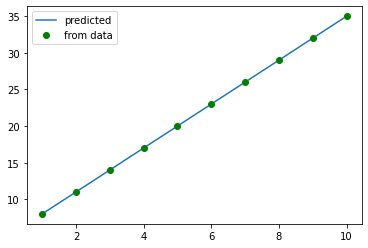

In [13]:
print(model.state_dict())
import matplotlib.pyplot as plt
X = X_train.detach().numpy()
plt.plot(X, predicted.detach().numpy(), label='predicted')
plt.plot(X, y_train.detach().numpy(), 'go', label='from data')
plt.legend()
plt.show()

### serialization

In [14]:
torch.save(model.state_dict(), './data/test_model.pkl')

In [15]:
model = LinearModel(1, 1)
model.load_state_dict(torch.load('./data/test_model.pkl'))

<All keys matched successfully>

## Logistic Model

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as func

class LogisticModel(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(LogisticModel, self).__init__()
        self.linear = nn.Linear(in_dim, out_dim)

    def forward(self, x):
        out = func.sigmoid(self.linear(x))
        return out

In [19]:
model = LogisticModel(1, 1)
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [20]:
X_train = torch.tensor([[1.6],[2.1],[1.3], [4.8], [3.5]], dtype=torch.float).reshape(-1, 1)
y_train = torch.tensor([[0],[0],[0],[1],[1]], dtype=torch.float).reshape(-1, 1)

test = torch.tensor([[0.1],[1.5],[2.3],[3.0],[6.4]])
results = model(test)
for result in results:
    if result <= 0.5:
        print(result, 'false')
    else:
        print(result, 'true')


tensor([0.6941], grad_fn=<UnbindBackward0>) true
tensor([0.6586], grad_fn=<UnbindBackward0>) true
tensor([0.6374], grad_fn=<UnbindBackward0>) true
tensor([0.6184], grad_fn=<UnbindBackward0>) true
tensor([0.5221], grad_fn=<UnbindBackward0>) true


## Multi-class classification Example

In [21]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as trans

trainSet = dsets.MNIST(root='./data', train=True, transform=trans.ToTensor(), download=True)
print('Number of images: {}'.format(len(trainSet)))
print('Type {}'.format(type(trainSet[0][0])))
print('Size of each image {}'.format(trainSet[0][0].size()))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Number of images: 60000
Type <class 'torch.Tensor'>
Size of each image torch.Size([1, 28, 28])


In [22]:
class MultiLogisticModel(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(MultiLogisticModel, self).__init__()
        self.linear = nn.Linear(in_dim, out_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

In [23]:
in_dim = 28 * 28
out_dim = 10
model = MultiLogisticModel(in_dim, out_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
batch_size = 100
epochs = 5
train_loader = torch.utils.data.DataLoader(dataset=trainSet, batch_size=batch_size, shuffle=True)

In [24]:
for epoch in range(epochs):
    runningLoss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        runningLoss += loss.item()

    print(runningLoss)

1222.227562904358
971.5172768831253
811.5572783946991
705.2696732282639
631.1544543504715


In [25]:
predicted = model.forward(images)
predicted.size()

torch.Size([100, 10])

In [26]:
print("predictions {}".format(predicted[0]))
print("labels {}".format(labels[0]))

predictions tensor([ 0.4332, -0.4860, -0.5980,  1.7326, -0.4145,  1.1609,  0.1776, -1.1747,
         0.3486, -0.3168], grad_fn=<SelectBackward0>)
labels 3


In [28]:
import numpy as np
def successRate(predicted, labels):
    predict = [np.argmax(p.detach().numpy()) for p in predicted]
    actual = [labels[i].item() for i in range(len(predicted))]
    correct = [i for i, j in zip(predict, actual) if i == j]
    return len(correct) / len(predict)
successRate(predicted, labels)

0.8